# Comparison of Bike Sharing Trends Before and During the COVID-19 Pandemic
## by Clifford Aniakor

## Executive Summary
According to the Washington Post, March 11, 2020 was the day of a "high-profile diagnosis, event cancellations, and an official designation: pandemic. Schools closed, streets emptied and commuters stayed home". In this project, we'll be comparing its effect on bike sharing using the data from the [capital bikes share website](https://capitalbikeshare.com/) in Washington D.C. Bike sharing data from March 2019 will be compared to that from March 2020 to reveal interesting insights. <img src="CaBi-homepage-hero4.jpg" width="700" height="1400">


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

In [3]:
#Load the 2 datasets
cap1=pd.read_csv("201903-capitalbikeshare-tripdata.csv")
cap2=pd.read_csv("202003-capitalbikeshare-tripdata.csv")

In [4]:
cap1.columns=cap1.columns.str.title()
cap2.columns=cap2.columns.str.title()
#replace spaces with underscores
cap1.columns=cap1.columns.str.replace(' ','_')
cap2.columns=cap2.columns.str.replace(' ','_')

In [5]:
#Convert to datetime
cap1.Start_Date=cap1.Start_Date.astype("datetime64[ns]")
cap1.End_Date=cap1.End_Date.astype("datetime64[ns]")
cap2.Start_Date=cap2.Start_Date.astype("datetime64[ns]")
cap2.End_Date=cap2.End_Date.astype("datetime64[ns]")

In [6]:
# Extract day and hours into new columns
cap1['Start_Day']=cap1['Start_Date'].dt.strftime('%a')
cap1['Start_Time']=cap1['Start_Date'].dt.strftime('%H')
cap2['Start_Day']=cap2['Start_Date'].dt.strftime('%a')
cap2['Start_Time']=cap2['Start_Date'].dt.strftime('%H')

In [7]:
#Convert to categorical variable
cap1.Start_Day.astype("category")
cap2.Start_Day.astype("category")

0         Sun
1         Sun
2         Sun
3         Sun
4         Sun
5         Sun
6         Sun
7         Sun
8         Sun
9         Sun
10        Sun
11        Sun
12        Sun
13        Sun
14        Sun
15        Sun
16        Sun
17        Sun
18        Sun
19        Sun
20        Sun
21        Sun
22        Sun
23        Sun
24        Sun
25        Sun
26        Sun
27        Sun
28        Sun
29        Sun
         ... 
162500    Tue
162501    Tue
162502    Tue
162503    Tue
162504    Tue
162505    Tue
162506    Tue
162507    Tue
162508    Tue
162509    Tue
162510    Tue
162511    Tue
162512    Tue
162513    Tue
162514    Tue
162515    Tue
162516    Tue
162517    Tue
162518    Tue
162519    Tue
162520    Tue
162521    Tue
162522    Tue
162523    Tue
162524    Tue
162525    Tue
162526    Tue
162527    Tue
162528    Tue
162529    Tue
Name: Start_Day, Length: 162530, dtype: category
Categories (7, object): [Fri, Mon, Sat, Sun, Thu, Tue, Wed]

## Univariate Exploration


### Compare the Number of Bike Shares Pre-Pandemic and During the Pandemic

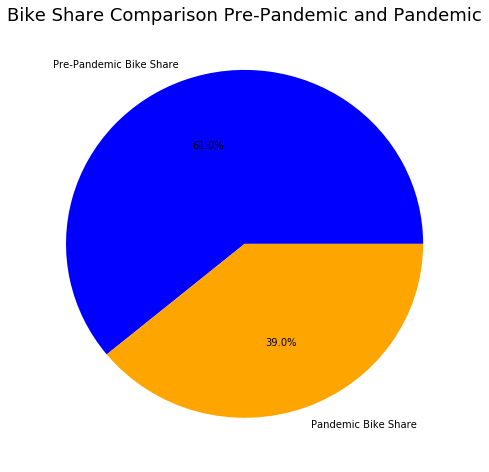

In [7]:
#Set fig size
plt.rcParams["figure.figsize"] = [8,8]
#Number of bike shares pre-pandemic
cap1.shape[0]
#Number of bike shares during the pandemic
cap2.shape[0]
#Enter both numbers in list
Share=[cap1.shape[0],cap2.shape[0]]
#List for sector lables
labels=['Pre-Pandemic Bike Share','Pandemic Bike Share']
#List containing pie chart colours
colours=['blue','orange']
#Pie plot
plt.pie(Share,labels=labels,autopct='%1.1f%%',colors=colours)

#Add and format title
plt.title("Bike Share Comparison Pre-Pandemic and Pandemic", fontsize=18);

The pandemic caused a major halt in everyday activities. For this reason, the 2020 capital bike shares only accounted for 39.0% in the combined timeframes.

### Compare the Distribution of Bike Sharing Duration Time Before and During the Pandemic

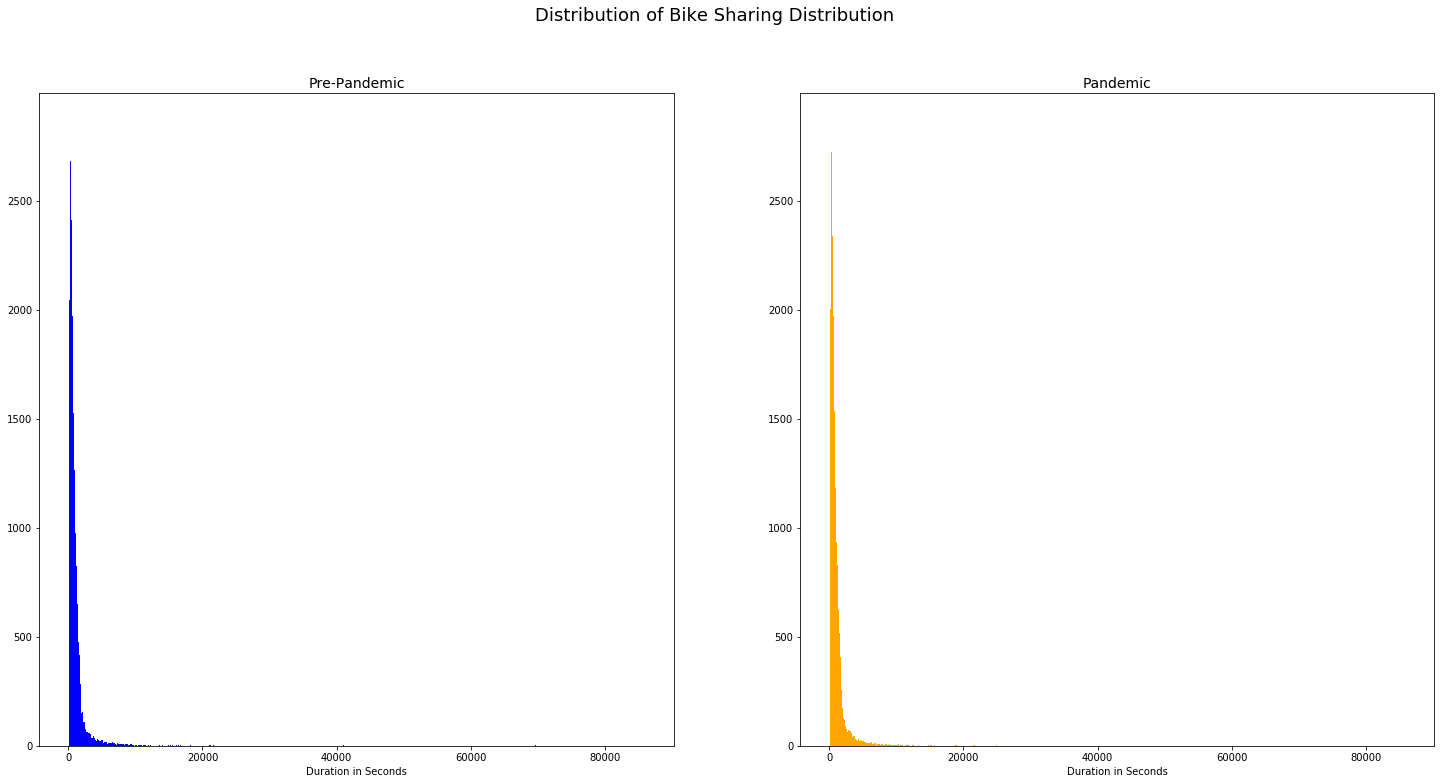

In [11]:
#Set figure size
plt.figure(figsize=[25,12])

plt.subplot(121)
#Number of hist bins
binsize = 10
bins = np.arange(0, cap1['Duration'].max()+binsize, binsize)
#Set plots' main title
plt.suptitle("Distribution of Bike Sharing Distribution", fontsize=18)
#Plot histogram
plt.hist(data = cap1, x = 'Duration', bins=bins, color='blue')
#Set labels for x-axis
plt.xlabel("Duration in Seconds")
#Set plot title
plt.title("Pre-Pandemic",fontsize=14)

plt.subplot(122)
#Obtain histogram bin array
bins2=np.arange(0,cap2['Duration'].max()+binsize, binsize)
#Plot histogram
plt.hist(data=cap1, x='Duration',bins=bins, color='orange')
#Set labels for x-axis
plt.xlabel("Duration in Seconds")
#Set plot title
plt.title("Pandemic",fontsize=14)
#Display Plots
plt.show()

It is obvious from the disproportionate distribution that a logarithmic transform is vital.

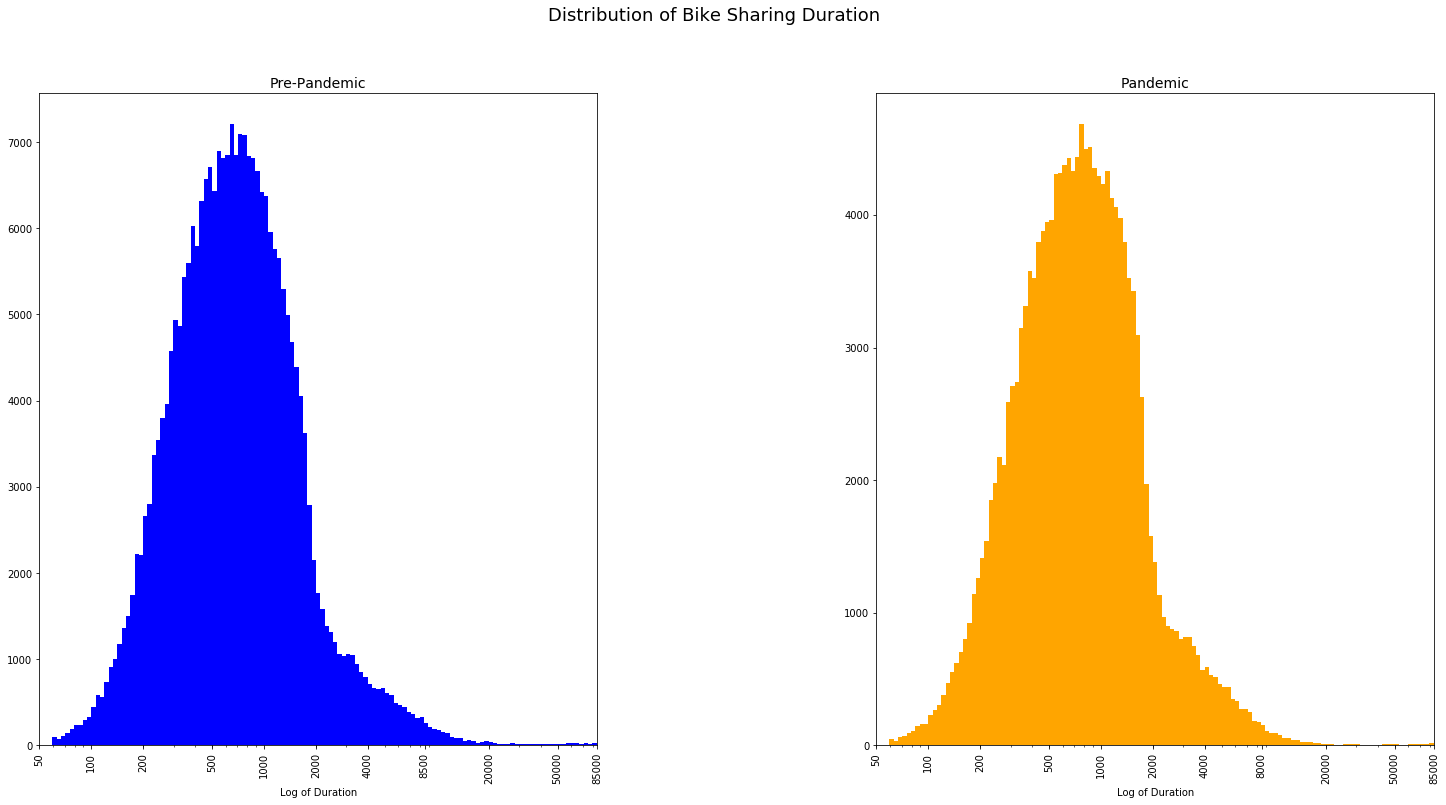

In [12]:
#Set plots' size
plt.rcParams["figure.figsize"] = [25, 12]
plt.subplot(121)
#Set plots' main title
plt.suptitle("Distribution of Bike Sharing Duration", fontsize=18)
#form logarithm array of bin sizes
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(cap1['Duration'].max())+log_binsize, log_binsize)
#plot histogram
plt.hist(data = cap1, x = 'Duration', bins = bins, color='blue')
#set plot title
plt.title("Pre-Pandemic",fontsize=14)
#Specify x-axis scale
plt.xscale('log')
#Set limits for x-axis
plt.xlim(60,85000)
#Set ticks on x-axis
plt.xticks([50, 100, 200, 500, 1000, 2000, 4000, 8500,20000,50000,85000], [50, 100, 200, 500, 1000, 2000, 4000, 8500,20000,50000,85000], rotation=90);
plt.xlabel('Log of Duration')
#set width space between the 2 plots
plt.subplots_adjust(wspace=0.5)

plt.subplot(122)
##form logarithm array of bin sizes
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(cap2['Duration'].max())+log_binsize, log_binsize)
#plot histogram
plt.hist(data = cap2, x = 'Duration', bins = bins,color="orange")
#set plot title
plt.title("Pandemic",fontsize=14)
#Specify x-axis scale
plt.xscale('log')
#Set limits for x-axis
plt.xlim(60,85000)
#Set ticks on x-axis
plt.xticks([50, 100, 200, 500, 1000, 2000, 4000, 8500,20000,50000,85000], [50, 100, 200, 500, 1000, 2000, 4000, 8000,20000, 50000,85000], rotation=90);
#Set x-axis label
plt.xlabel('Log of Duration')
#Display plots
plt.show()


The distribution of the duration times for both the pandemic and pre-pandemic seem fairly similar. They both have a long skew below the 20000 seconds marks. However, the pre-pandemic era had more rides between the 500 to 2000 seconds mark compared to the 2020 distribution.

### Compare the Different Membership Counts Pre-Pandemic and During the Pandemic

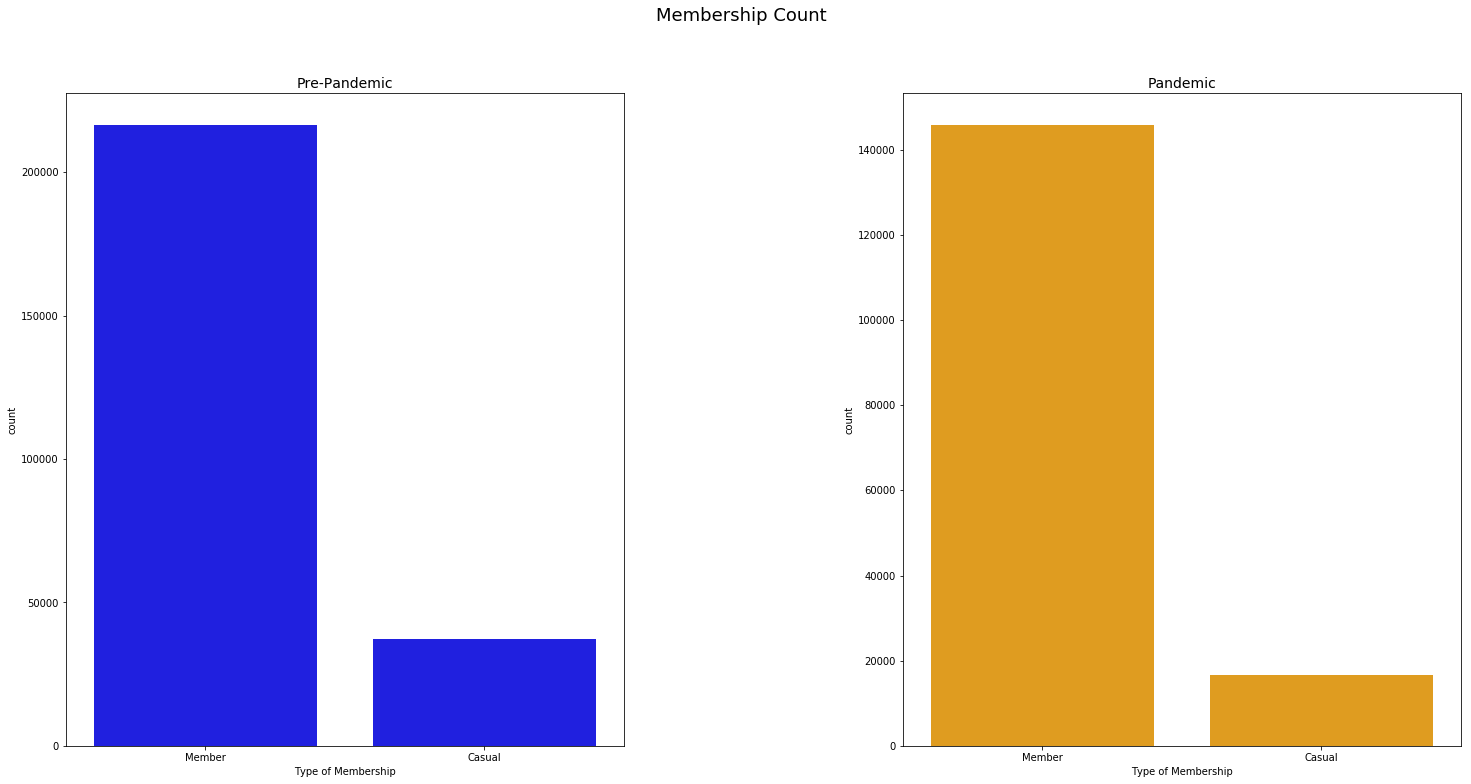

In [13]:
#Set plot size
plt.rcParams["figure.figsize"] = [25, 12]
plt.subplot(121)
#Set plots' main title
plt.suptitle("Membership Count", fontsize=18)
#Bar plot
sns.countplot(data=cap1, x='Member_Type', color='blue')
#Set label for x-axis
plt.xlabel("Type of Membership")
#Set plot title
plt.title('Pre-Pandemic',fontsize=14)
#Set width space between the 2 plots
plt.subplots_adjust(wspace=0.5)

plt.subplot(122)
#Bar plot
sns.countplot(data=cap2, x='Member_Type', color='orange')
##Set label for x-axis
plt.xlabel("Type of Membership")
##Set plot title
plt.title("Pandemic",fontsize=14)
#Display plots
plt.show()

It seems the pandemic caused a reduction in both members and casuals. It is also likely that they losed interest in bike sharing or decided to stay home for their own safety.

### Where Bike Sharing Starting Days Affected During the Pandemic?

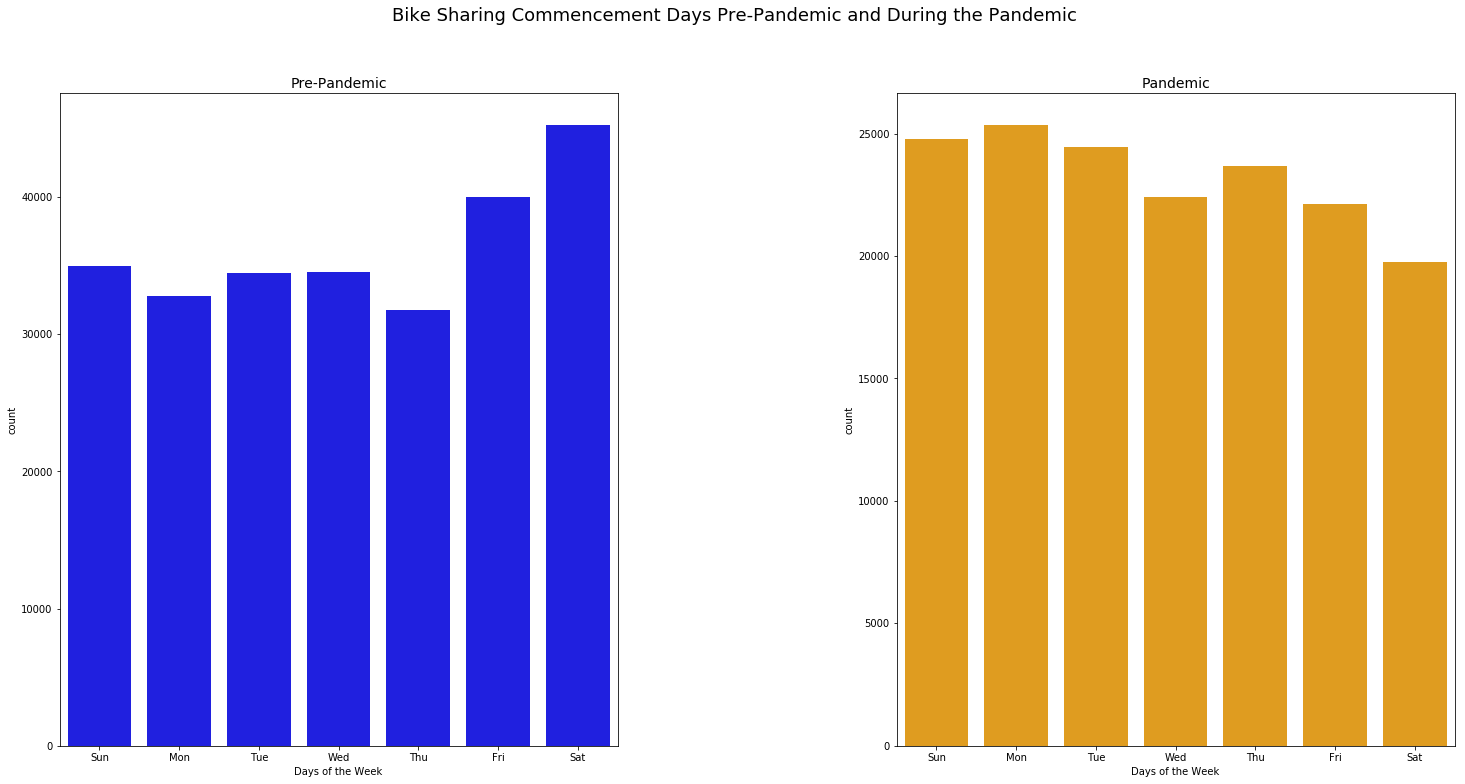

In [14]:
#Set plots' size
plt.rcParams["figure.figsize"] = [25, 12]
plt.subplot(121)
#Set plots' main title
plt.suptitle("Bike Sharing Commencement Days Pre-Pandemic and During the Pandemic", fontsize=18)
#Bar plot
sns.countplot(data=cap1, x='Start_Day', color='blue',order=['Sun','Mon','Tue','Wed','Thu','Fri','Sat'])
#Place plot title
plt.title('Pre-Pandemic',fontsize=14)
#Place label on x-axis
plt.xlabel("Days of the Week")
#Adjust width space between plots
plt.subplots_adjust(wspace=0.5)

plt.subplot(122)
#Bar plot
sns.countplot(data=cap2, x="Start_Day",color="orange",order=['Sun','Mon','Tue','Wed','Thu','Fri','Sat'])
#Place plot title
plt.title("Pandemic",fontsize=14)
#Enter label on x-axis
plt.xlabel("Days of the Week")
#Render plots
plt.show()

Saturday was the most preferred bike sharing start days in March 2019. This was also the weekend. However, with the pandemic, economic activities plummeted and office work became remote. Therefore, many riders preferred riding on Mondays. Saturday became the least preferred riding start day during the pandemic.

### What is the Share of the Two Membership Types for the Two Periods?

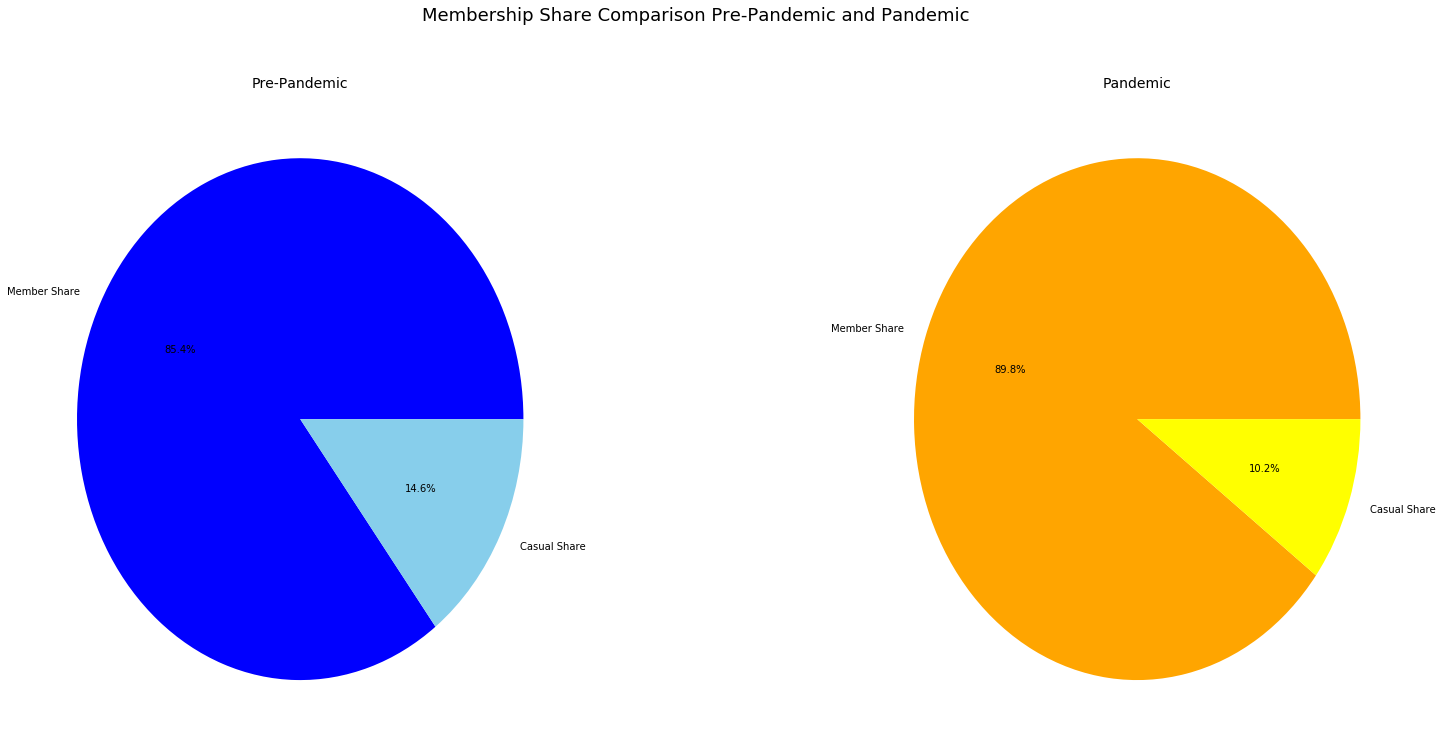

In [15]:
#Find the number of casuals and members
Member1=cap1.Member_Type.value_counts()[0]
Casual1=cap1.Member_Type.value_counts()[1]
Member2=cap2.Member_Type.value_counts()[0]
Casual2=cap2.Member_Type.value_counts()[1]
#Store member types counts in lists
Pre_Pandemic=[Member1, Casual1]
Pandemic=[Member2, Casual2]
#Create list for pie labels
Labels=['Member Share', 'Casual Share']
#Store wedge colours in lists
colours1=['blue','skyblue']
colours2=['orange','yellow']

#Plots size
fig=plt.figure(figsize=(20,8))
plt.subplot(121)
#Enter plots' main title
plt.suptitle("Membership Share Comparison Pre-Pandemic and Pandemic", fontsize=18)
#pie plot
plt.pie(Pre_Pandemic,labels=Labels,autopct='%1.1f%%',colors=colours1)
#Specify plot title
plt.title("Pre-Pandemic", fontsize=14)
#Adjust plots' width space
plt.subplots_adjust(wspace=0.5)

plt.subplot(122)
#Pie Plot
plt.pie(Pandemic,labels=Labels,autopct='%1.1f%%',colors=colours2)
#Specify plot title
plt.title("Pandemic", fontsize=14)
#Render plots
plt.show()

Before the Pandemic, Casuals had a 14.6% share compared to members 85.4%. It seems that during the pandemic some casuals either became members or they simply lost interest.

### Which Stations Were Mostly Frequented During the 2 Time Frames?

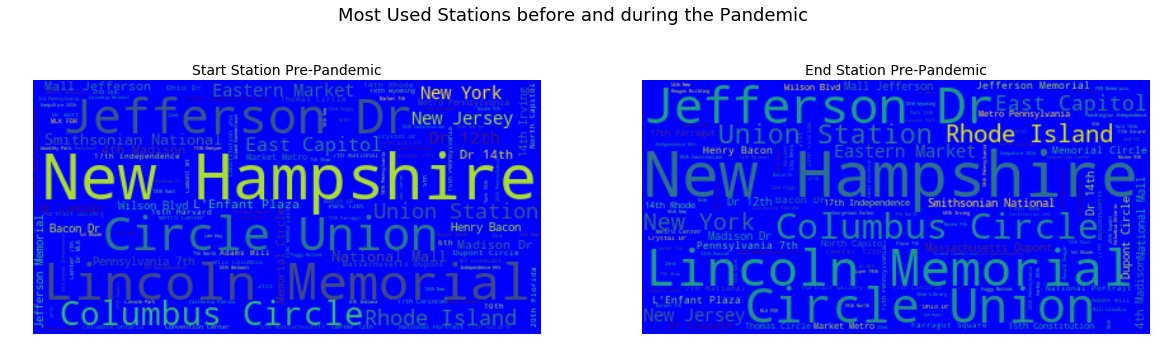

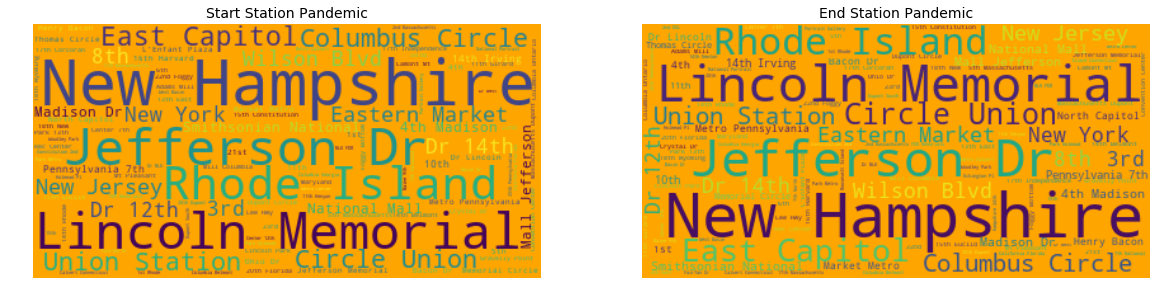

In [30]:
#Specify Wordcloud size
plt.rcParams["figure.figsize"] = [20, 8]
#Specify wordclouds' main title
plt.suptitle("Most Used Stations before and during the Pandemic",fontsize=18, y=0.85)
#Compile all start and end station entries and store in variables
text1=" ".join(station for station in cap1.Start_Station)
text2=" ".join(station for station in cap1.End_Station)
text3=" ".join(station for station in cap2.Start_Station)
text4=" ".join(station for station in cap2.Start_Station)
# Create stopword list (words to exclude)
stopwords = set(STOPWORDS)
stopwords.update(["Rd","St","Ave","NE","/","NW","&","SE","SW","N","S"])

plt.subplot(121)
#Create wordcloud
wordcloud = WordCloud(max_font_size=50, max_words=1000, background_color="blue",stopwords=stopwords).generate(text1)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
#Specify wordcloud title
plt.title("Start Station Pre-Pandemic", fontsize=14)

plt.subplot(122)
#Build wordcloud
wordcloud = WordCloud(max_font_size=50, max_words=1000, background_color="blue",stopwords=stopwords).generate(text2)
plt.imshow(wordcloud, interpolation="bilinear")
#Specify wordcloud title
plt.title("End Station Pre-Pandemic", fontsize=14)
plt.axis("off")
#Render wordclouds
plt.show()

plt.subplot(121)
#Create wordcloud
wordcloud = WordCloud(max_font_size=50, max_words=1000, background_color="orange",stopwords=stopwords).generate(text3)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
#Set wordcloud title
plt.title("Start Station Pandemic", fontsize=14)

plt.subplot(122)
#Create wordcloud
wordcloud = WordCloud(max_font_size=50, max_words=1000, background_color="orange",stopwords=stopwords).generate(text4)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
#Set wordcloud title
plt.title("End Station Pandemic", fontsize=14)
#Display wordcloud
plt.show()


Stations in New Hamspshire remained the used start and end station before and during the pandemic.

### Was There a Repetition of the Most Used Bikes Pre- Pandemic and During the Pandemic?

In [17]:
#Top 20 most shared bikes pre-pandemic
cap1['Bike_Number'].value_counts().nlargest(20)

E00062    245
78370     243
75768     222
70004     218
E00129    213
78119     212
E00093    211
E00134    211
75562     184
W23776    183
W23699    178
E00145    169
W23971    169
W23929    167
70232     166
W24112    165
W24118    164
W23790    162
E00117    158
W22781    157
Name: Bike_Number, dtype: int64

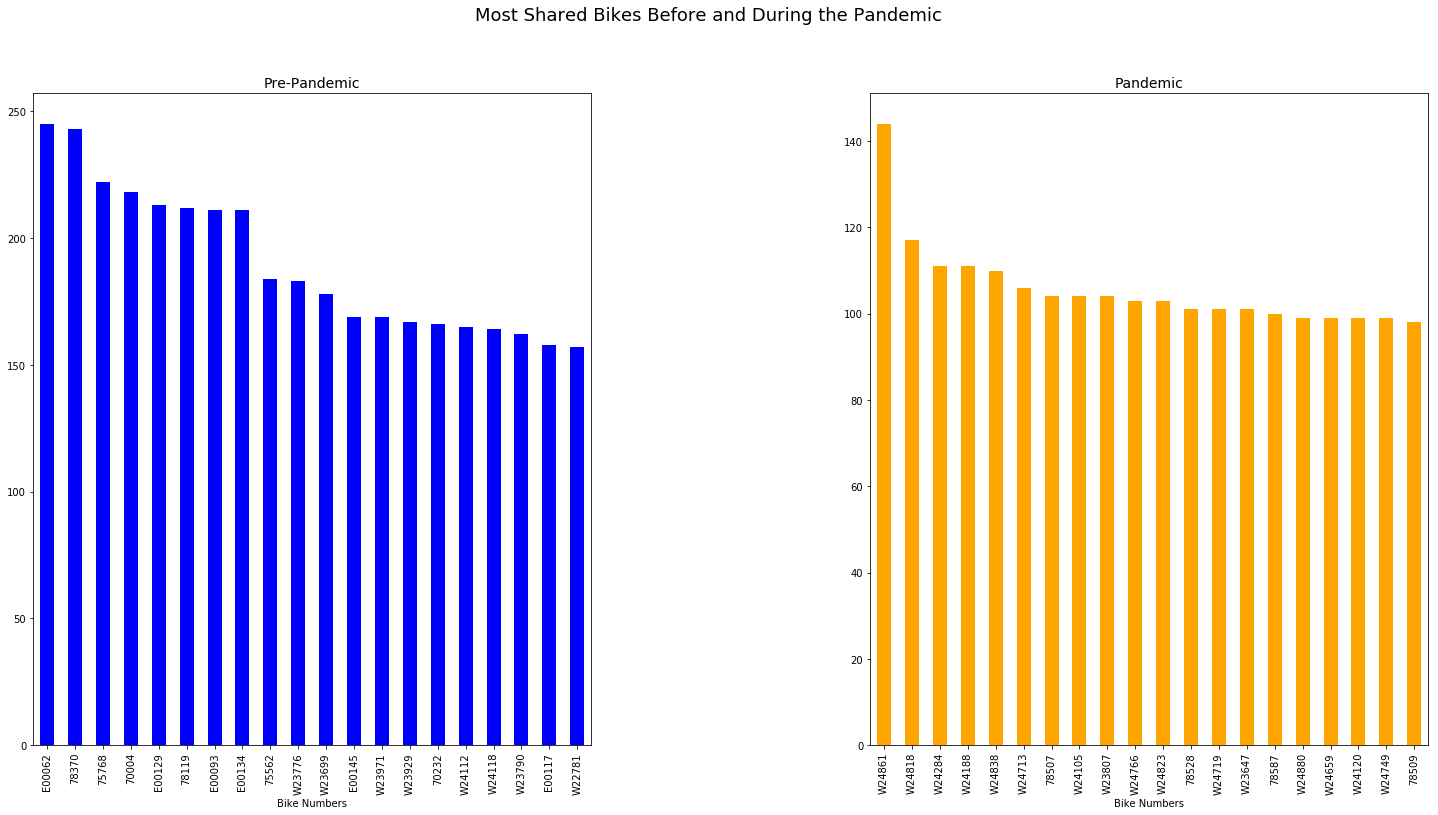

In [18]:
#Set plots size
plt.rcParams["figure.figsize"] = [25, 12]
plt.subplot(121)
#Specify plots' main title
plt.suptitle("Most Shared Bikes Before and During the Pandemic", fontsize=18)
#Top 20 most shared bikes pre-pandemic
bike1=cap1['Bike_Number'].value_counts().nlargest(20)
#Bar plot
bike1.plot(kind='bar', color='blue')
#Set plot title
plt.title('Pre-Pandemic',fontsize=14)
#Set label on x-axis
plt.xlabel("Bike Numbers")
#Adjust plots' width space
plt.subplots_adjust(wspace=0.5)

plt.subplot(122)
##Top 20 most shared bikes during the pandemic
bike2=cap2['Bike_Number'].value_counts().nlargest(20)
#Bar plot
bike2.plot(kind='bar',color='orange')
#Set plot title
plt.title("Pandemic",fontsize=14)
plt.xlabel("Bike Numbers")
#Display plots
plt.show()

None of the the top 20 most shared bikes in 2019 made it to the 2020 list. Most of the most shared bikes in 2020 were W-class. During the pandemic, sharing and touching surfaces were largely discouragely. It is possible that most of the bikes had to refurbished to make them "COVID-averse".

## Bivariate Exploration


### How Does Bike Sharing Vary With Each Start Hour and Day for the Two Periods?

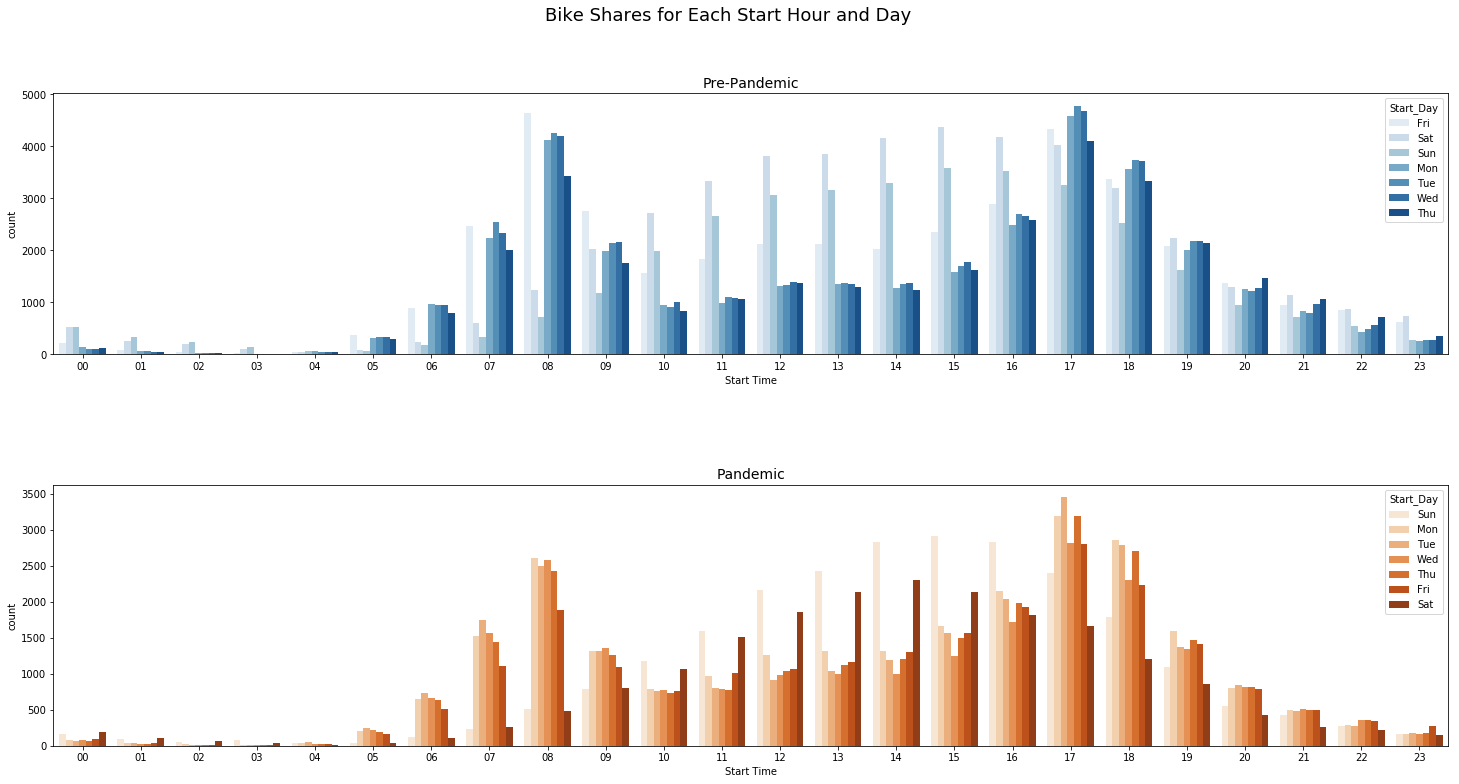

In [17]:
#Specify plots' size
fig=plt.figure(figsize=(25,12))

plt.subplot(211)
#Bar plot
sns.countplot(data=cap1,x='Start_Time',hue='Start_Day',palette='Blues')
#Specify plots' main title
plt.suptitle("Bike Shares for Each Start Hour and Day", fontsize=18)
#Specify plot title
plt.title('Pre-Pandemic',fontsize=14)
#Specify plot label on the x-axis
plt.xlabel("Start Time")
#Alter plots vertical space
plt.subplots_adjust(hspace=0.5)

plt.subplot(212)
#Bar plot
sns.countplot(data=cap2,x='Start_Time',hue='Start_Day',palette ='Oranges')
#Specify plot title
plt.title('Pandemic',fontsize=14)
#Specify plot label on the x-axis
plt.xlabel("Start Time")
#Render plots
plt.show()

- 17:00 was the most preferred start hour with Tuesday been its highest day both in 2019 and 2020
- There little bike sharing activities in the mornings in both eras. This is reasonable because capital bikes is definitely       closed by those hours.
- Saturday mainted a somewhat uniform distribution across each start hour before the pandemic

### How Does Bike Sharing Vary With Each Start Hour and Membership Type for the Two Periods?

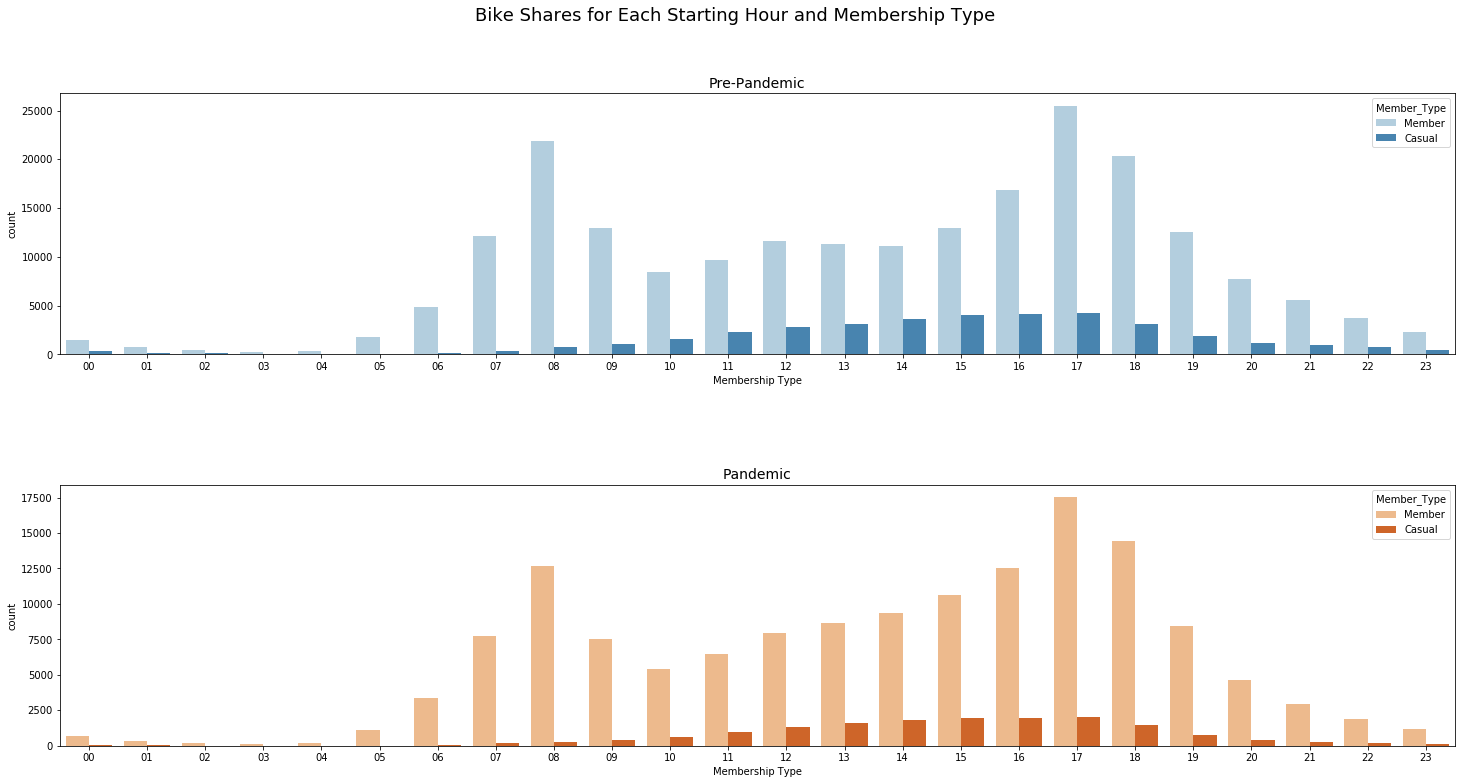

In [18]:
#Set plots size
fig=plt.figure(figsize=(25,12))

plt.subplot(211)
#Bar plot
sns.countplot(data=cap1,x='Start_Time',hue='Member_Type',palette='Blues')
#Place plots' main title
plt.suptitle("Bike Shares for Each Starting Hour and Membership Type", fontsize=18)
#Add plot title
plt.title('Pre-Pandemic',fontsize=14)
#Add label on the x-axis
plt.xlabel("Membership Type")
#Adjust vertical space between plots 
plt.subplots_adjust(hspace=0.5)

plt.subplot(212)
#Bar plot
sns.countplot(data=cap2,x='Start_Time',hue='Member_Type',palette ='Oranges')
#Add plot title
plt.title('Pandemic',fontsize=14)
#Add label on the x-axis
plt.xlabel("Membership Type")
#Render plots
plt.show()

- The pre-pandemic and pandemic have a similar distribution trend.
- 17:00 remained the most prefered riding hour by both members and casuals.

### How Does Bike Sharing Vary With Each Start Day and Membership Type for the Two Periods?

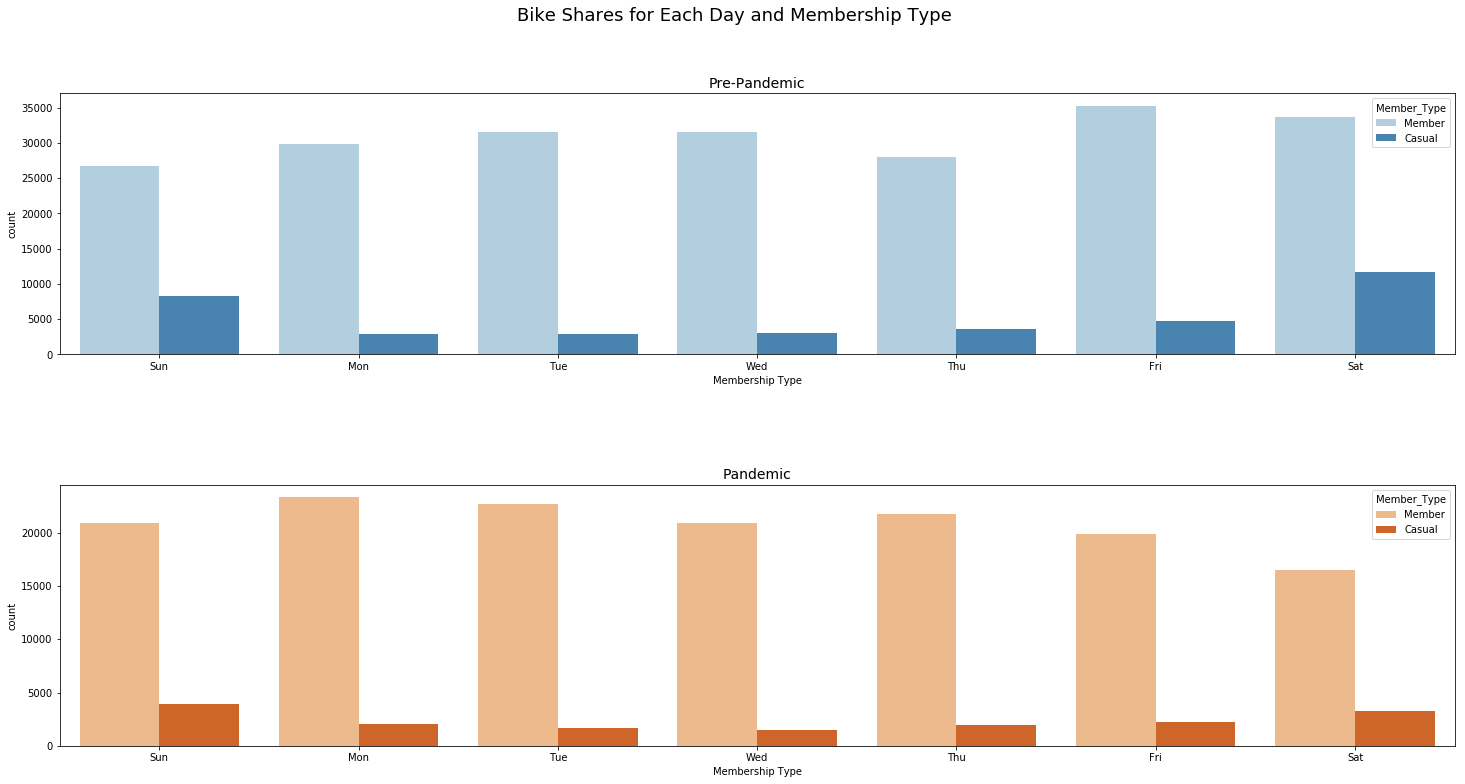

In [19]:
#Set plots' size
fig=plt.figure(figsize=(25,12))
plt.subplot(211)
#Bar plot
sns.countplot(data=cap1,x='Start_Day',hue='Member_Type',palette='Blues',order=['Sun','Mon','Tue','Wed','Thu','Fri','Sat'])
#Set plots' main title
plt.suptitle("Bike Shares for Each Day and Membership Type", fontsize=18)
#Set plot title
plt.title('Pre-Pandemic',fontsize=14)
#Specify label for x-axis
plt.xlabel("Membership Type")
#Adjust plots' vertical space
plt.subplots_adjust(hspace=0.5)

plt.subplot(212)
#Bar plot
sns.countplot(data=cap2,x='Start_Day',hue='Member_Type',palette ='Oranges',order=['Sun','Mon','Tue','Wed','Thu','Fri','Sat'])
#Set plot title
plt.title('Pandemic',fontsize=14)
#Specify label for x-axis
plt.xlabel("Membership Type")
#Display plots
plt.show()

- Before the pandemic, Saturday was the most preferred day for casuals while Friday was the most preferred day for members.
- During the pandemic, Monday was the most preferred start day for members while Sunday was the most preferred start day for     casuals.
- Pre-Pandemic, Thursday was the least preferred start day for menmbers while Saturday was the least preferred start day for     members during the pandemic.

## Multivariate Exploration


### How does the members and casuals duration times differ across the days of the week for the 2 periods?

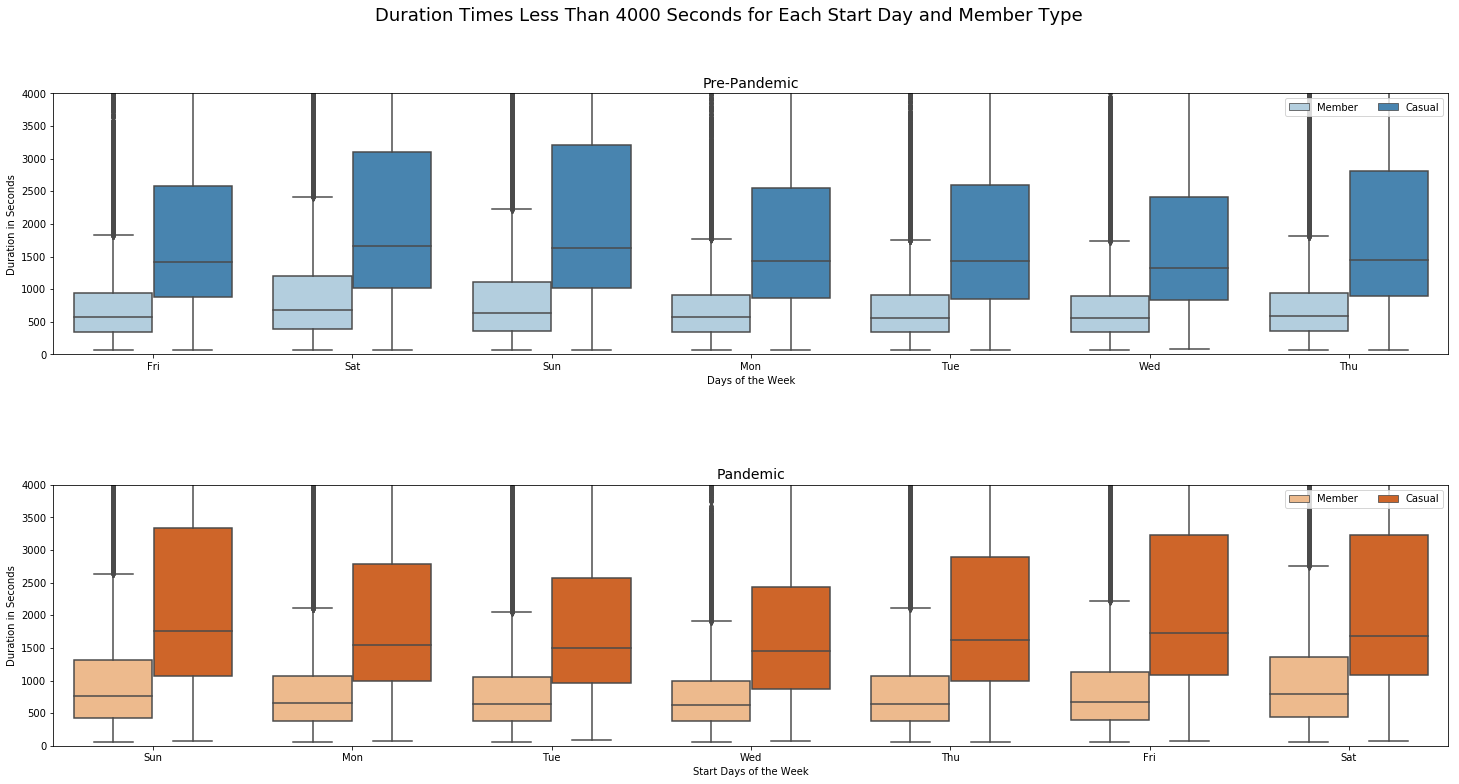

In [16]:
#Specify plots' size
fig=plt.figure(figsize=(25,12))
plt.subplot(211)
#Box plot
sns.boxplot(data=cap1,y='Duration',x='Start_Day',hue="Member_Type",palette="Blues")
#Less than 4000 seconds
plt.ylim(0,4000)
#Set plots' title
plt.suptitle("Duration Times Less Than 4000 Seconds for Each Start Day and Member Type", fontsize=18)
#Set plot title
plt.title('Pre-Pandemic',fontsize=14)
#Specify label for y-axis
plt.ylabel("Duration in Seconds")
#Specify label for x-axis
plt.xlabel("Days of the Week")
plt.legend(ncol = 2, loc="upper right")
#Set vertical space between plots
plt.subplots_adjust(hspace=0.5)

plt.subplot(212)
#Box plot
sns.boxplot(data=cap2,y='Duration',x='Start_Day',hue="Member_Type",palette="Oranges")
#Less than 4000 seconds
plt.ylim(0,4000)
#Specify label for y-axis
plt.ylabel("Duration in Seconds")
#Set plot title
plt.title('Pandemic',fontsize=14)
plt.legend(ncol = 2, loc="upper right")
#Specify label for x-axis
plt.xlabel("Start Days of the Week")
#Show plots
plt.show()

- There is a saturation of outliers for members bike sharing duration both pre-pandemic and during the pandemic. This is due to the fact that members pay less. They are therefore, less inclined to redeem their spending by increasing their duration time.
- Casuals both pre-pandemic and during the pandemic on all days spent longer times riding than members.
- Given that interquatile ranges and median differ significantly in a similar pattern for each day, we can conclude that there is a difference in bike sharing durations for members and casuals.

### Examine the Average Durations of Each Membership for Distinct Weeks Days

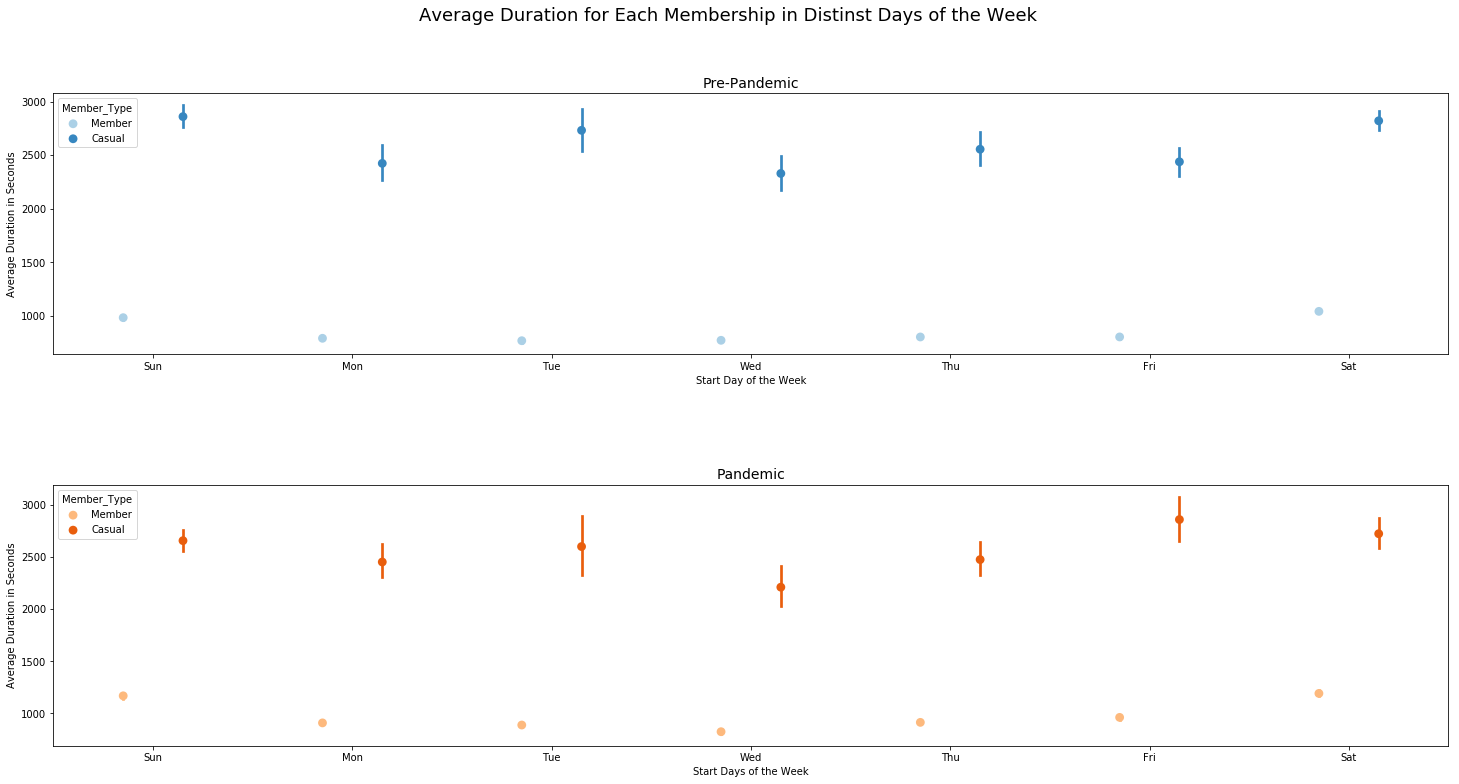

In [23]:
#Specify fig size
fig=plt.figure(figsize=(25,12))
plt.subplot(211)
#Pointplot
sns.pointplot(data=cap1, x='Start_Day', y='Duration', dodge=0.3, hue='Member_Type', linestyles="", palette='Blues',order=['Sun','Mon','Tue','Wed','Thu','Fri','Sat'])
#Set plots' main title
plt.suptitle("Average Duration for Each Membership in Distinst Days of the Week", fontsize=18)
#Specify plot title
plt.title('Pre-Pandemic',fontsize=14)
#Add a label to the y-axis
plt.ylabel("Average Duration in Seconds")
#Add a label to the x-axis
plt.xlabel("Start Day of the Week")
#adjust the vertical space between plots
plt.subplots_adjust(hspace=0.5)

plt.subplot(212)
#Pointplot
sns.pointplot(data=cap2, x='Start_Day', y='Duration', hue='Member_Type', dodge=0.3, linestyles="",palette='Oranges',order=['Sun','Mon','Tue','Wed','Thu','Fri','Sat'])
#Add a label to the y-axis
plt.ylabel("Average Duration in Seconds")
#Specify plot title
plt.title('Pandemic',fontsize=14)
#Add a label to the x-axis
plt.xlabel("Start Days of the Week")
#Render plots
plt.show()

- On average, casuals spend more time riding compared to members both in the pandemic and pre-pandemic years.

### Describe the Hourly Usage of Bikes by Different Members on Different Days of the Week?

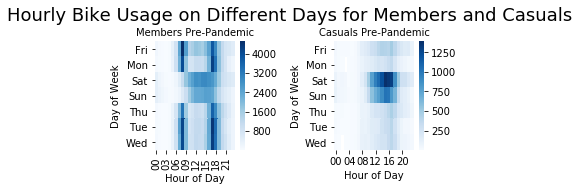

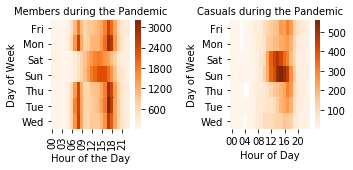

In [21]:
#Set heatmaps' size
plt.rcParams["figure.figsize"] = [5, 2]
plt.subplot(121)
#Set heatmaps' main title
plt.suptitle('Hourly Bike Usage on Different Days for Members and Casuals',fontsize=18, y=1.12)
#Extract members' data pre-pandemic
members1= cap1.query('Member_Type== "Member"')
counts1 = members1.groupby(['Start_Day', 'Start_Time']).size()
counts1 = counts1.reset_index(name='count')
counts1 = counts1.pivot(index='Start_Day', columns='Start_Time', values='count')
#Heatmap
sns.heatmap(counts1, cmap='Blues')
#Heatmap's title
plt.title('Members Pre-Pandemic',fontsize=10)
#Heatmap's x-axis label
plt.xlabel('Hour of Day')
#Heatmap's y-axis label
plt.ylabel('Day of Week')
#Horizontal space between heatmaps
plt.subplots_adjust(wspace=0.8)

plt.subplot(122)
#Extract casuals' data pre-pandemic
casual1= cap1.query('Member_Type == "Casual"')
counts2 = casual1.groupby(['Start_Day', 'Start_Time']).size()
counts2 = counts2.reset_index(name='count')
counts2 = counts2.pivot(index='Start_Day', columns='Start_Time', values='count')
#Heatmap
sns.heatmap(counts2, cmap='Blues')
#Heatmap's title
plt.title('Casuals Pre-Pandemic',fontsize=10)
#Heatmap's x-axis label
plt.xlabel('Hour of Day')
#Heatmap's y-axis label
plt.ylabel('Day of Week')
#Render heatmaps
plt.show()

#Set heatmaps' size
plt.rcParams["figure.figsize"] = [5, 2]
plt.subplot(121)
#Extract members' data during the pandemic
members2= cap2.query('Member_Type== "Member"')
counts3 = members2.groupby(['Start_Day', 'Start_Time']).size()
counts3 = counts3.reset_index(name='count')
counts3 = counts3.pivot(index='Start_Day', columns='Start_Time', values='count')
#Heatmap
sns.heatmap(counts3, cmap='Oranges')
#Heatmap's title
plt.title('Members during the Pandemic',fontsize=10)
#Heatmap's x-axis label
plt.xlabel('Hour of the Day')
#Heatmap's y-axis label
plt.ylabel('Day of Week')
#Set horizontal space between the heatmaps
plt.subplots_adjust(wspace=0.8)

plt.subplot(122)
#Extract casuals' data during the pandemic
casual2= cap2.query('Member_Type == "Casual"')
counts4 = casual2.groupby(['Start_Day', 'Start_Time']).size()
counts4 = counts4.reset_index(name='count')
counts4 = counts4.pivot(index='Start_Day', columns='Start_Time', values='count')
#Heatmap
sns.heatmap(counts4, cmap='Oranges')
#Heatmap's title
plt.title('Casuals during the Pandemic',fontsize=10)
#Heatmap's x-axis label
plt.xlabel('Hour of Day')
#Heatmap's y-axis label
plt.ylabel('Day of Week')
#Render heatmaps
plt.show()

- Before the pandemic, more than 4000 members had rides on Fridays at 8:00 and on Tuesdays by 17:00. More than 1250 casuals engaged in bike sharing on Saturdays at 15:00. 
- During the pandemic, more than 3000 members engaged in bike sharing on Tuesdays at 17:00 while more than  casuals engaged in  bike sharing on Sundays at 15:00.

## Conclusions
- In conclusion, while there was a significant reduction in bike sharing activies during the pandemic, some trends were however, repeated during the pandemic and pre-pandemic eras. For instance, casuals engaged in lengthier bike rides than members on all days of the week. Also, stations in New Hampshire remained the most used start and end stations within the 2 time frames.
- There was change in most preferred activity days. For example, before the pandemic, Saturdays and Fridays were the two most preferred bike sharing start days. During the pandemic, people worked from home and this made Mondays and Tuesdays become the two most preferred riding days.
- There was however, no significant change in preferred bike sharing start hours. 17:00 and 15:00 remained the two most preferred riding start hours both before and during the pandemic.
- The top 20 most shared bikes in 2019 were either not COVID-averse enough, were worn-out and needed repair or just they weren't the riders favorites anymore during the pandemic.

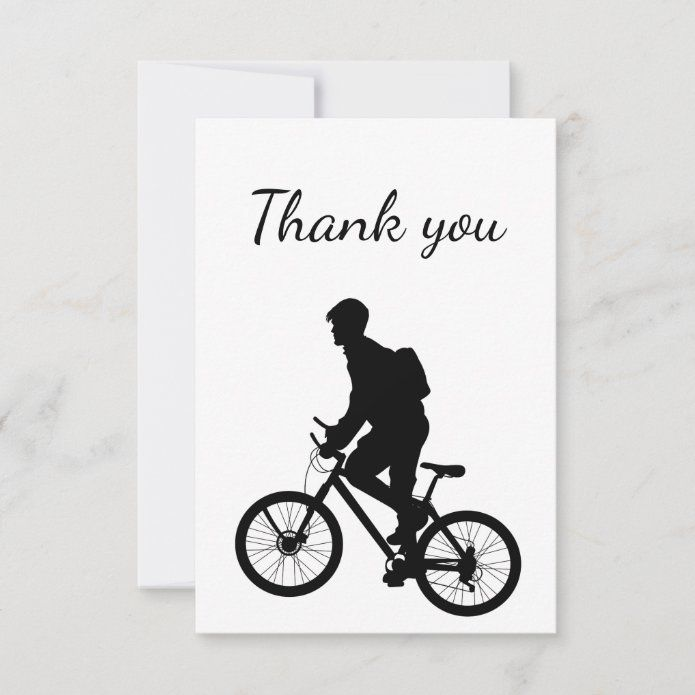

In [ ]:
 ! jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 1517932 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin